# Neural Network walk through

This dataset is taken from the MiniBooNE experiment and is used to distinguish electron neutrinos (signal)
from muon neutrinos (background). The dataset contains 130,065 samples with 50 features and a single
binary label. We will randomly split the dataset into training (80%) and testing (20%) subsets.

MiniBooNE dataset: https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
data = fetch_openml("miniboone", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

Using the MiniBooNE dataset and the Keras Model API, we wil train a neural network with 3 hidden layers each with 128 units and tanh activations. The final layer should have sigmoid activation. Use the binary crossentropy loss function, the SGD optimizer with a learning rate of 0.01 (which is the default), and a batch size of 128. 

Note: Stochastic gradient descent (SGD) is an important optimization method in machine learning, used everywhere from logistic regression to training neural networks.

In [3]:
inputs = Input(shape=X_train.shape[1:])
x = Dense(128, activation="tanh")(inputs)   #input layer
x = Dense(128, activation="tanh")(x)        #first layer, using input layer
x = Dense(128, activation="tanh")(x)        #second layer, using first layer
outputs = Dense(1, activation='sigmoid')(x) #final layer
model_1 = Model(inputs=inputs, outputs=outputs)

# Compile the model with SGD and binary crossentropy loss
model_1.compile(optimizer="sgd", loss="binary_crossentropy")

In [4]:
# Fit the training data for 50 epochs with a batch size of 128
history_1 = model_1.fit(X_train, y_train, verbose=1, epochs=50, batch_size=128)

# The predictions
preds_nn_1 = model_1.predict(X_test)

Epoch 1/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3783
Epoch 2/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3706
Epoch 3/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3855
Epoch 4/50
813/813 [==============================] - 2s 2ms/step - loss: 0.4071
Epoch 5/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3864
Epoch 6/50
813/813 [==============================] - 2s 2ms/step - loss: 0.4161
Epoch 7/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3811
Epoch 8/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3745
Epoch 9/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3752
Epoch 10/50
813/813 [==============================] - 2s 2ms/step - loss: 0.3968
Epoch 11/50
813/813 [==============================] - 2s 2ms/step - loss: 0.4204
Epoch 12/50
813/813 [==============================] - 2s 2ms/step - loss: 0.4337
Epoch 13/50
813/813 [====

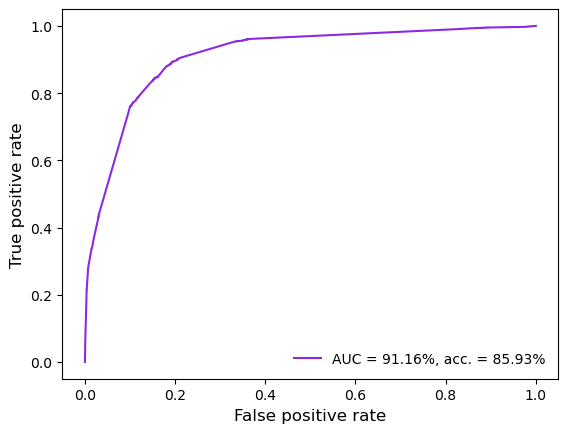

In [5]:
# Plot the receiver operating characteristic (ROC) curve using the testing dataset.
from roc_helper import plot_roc           #this is a python script in the folder
fig = plot_roc(y_test, preds_nn_1)
fig.savefig("roc_nn.pdf")                 #open file and see

# What does the Area Under the Curve (AUC) and accuary say about our model?

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Activation

In deep learning,  Activation functions are the very important part of the any neural network because it is able to perform a very complicated and critical  work like an object detection, image classification, language translation, etc.  which are necessary to address by using an activation function.

Activation function is used to generate or define a particular output for a given node based on the input is getting provided. The activation function is applied onto the summation results.

**Sigmoid function** normalizes the output of any input in the range between 0 to 1.

**Tanh function** is superior then the Sigmoid function because the range of this activation function is higher. Its range is -1 to 1.

**Rectified Linear Unit (ReLu)** is the best and most advanced activation function right now. Its range is 0 to infinity.

Learn more about activation functions here --> https://www.aitude.com/comparison-of-sigmoid-tanh-and-relu-activation-functions/ 

In [7]:
inputs = Input(shape=X_train.shape[1:])
x = Dense(128, activation="relu")(inputs)        #input layer
x = Dense(128, activation="relu")(x)             #first layer
x = Dense(128, activation="relu")(x)             #second layer
outputs = Dense(1, activation="sigmoid")(x)      #third layer
model_2 = Model(inputs=inputs, outputs=outputs)

In [8]:
# Compile the model with SGD and binary crossentropy loss
model_2.compile(optimizer="sgd", loss="binary_crossentropy")

# Fit the training data for 50 epochs with a batch size of 128
history = model_2.fit(X_train, y_train, verbose=1, epochs=50, batch_size=128)

# The predictions
preds_nn_2 = model_2.predict(X_test)

Epoch 1/50
813/813 [==============================] - 2s 2ms/step - loss: nan
Epoch 2/50
813/813 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/50
813/813 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/50
813/813 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/50
813/813 [==============================] - 2s 2ms/step - loss: nan
Epoch 6/50
813/813 [==============================] - 2s 2ms/step - loss: nan
Epoch 7/50
813/813 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/50
813/813 [==============================] - 2s 2ms/step - loss: nan
Epoch 9/50
813/813 [==============================] - 2s 2ms/step - loss: nan
Epoch 10/50
813/813 [==============================] - 1s 2ms/step - loss: nan
Epoch 11/50
813/813 [==============================] - 2s 2ms/step - loss: nan
Epoch 12/50
813/813 [==============================] - 1s 2ms/step - loss: nan
Epoch 13/50
813/813 [==============================] - 1s 2ms

Notices all of the losses are nan. We will fit the model again, but this time scale it first and change from sdg to adam for the opitmizer.

Adaptive Moment Estimation (adam) is is the best optimizer on average. It works with momentums of first and second order. The intuition behind the Adam is that we don’t want to roll so fast like momentum (another optimizer) just because we can jump over the minimum, we want to decrease the velocity a little bit for a careful search.

Adam tends to converge faster, while SGD often converges to more optimal solutions. 

Learn more about optimizers here --> https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Redoing the layers with ReLu activations
inputs = Input(shape=X_train.shape[1:])
x = Dense(128, activation="relu")(inputs)
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model_3 = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam and binary crossentropy loss
model_3.compile(optimizer="adam", loss="binary_crossentropy")
history_3 = model_3.fit(X_train_scaled, y_train, verbose=1, epochs=50, batch_size=128)

preds_nn_3 = model_3.predict(X_test_scaled)

Epoch 1/50
813/813 [==============================] - 2s 2ms/step - loss: 0.2582
Epoch 2/50
813/813 [==============================] - 2s 2ms/step - loss: 0.2150
Epoch 3/50
813/813 [==============================] - 2s 2ms/step - loss: 0.2013
Epoch 4/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1901
Epoch 5/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1830
Epoch 6/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1783
Epoch 7/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1742
Epoch 8/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1709
Epoch 9/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1682
Epoch 10/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1662
Epoch 11/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1645
Epoch 12/50
813/813 [==============================] - 2s 2ms/step - loss: 0.1620
Epoch 13/50
813/813 [====

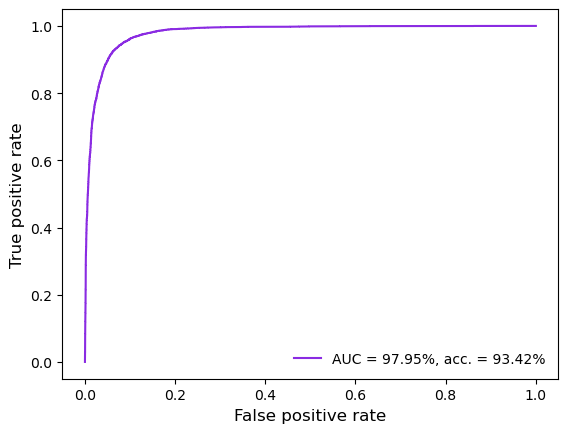

In [10]:
from roc_helper import plot_roc
fig = plot_roc(y_test, preds_nn_3)
fig.savefig("roc_nn_scaler.pdf")

Open up both roc_nn and roc_nn_scaler pdfs. Compare the AUC and accuarcy. 

Which one is faster? Which one is more accurate? 

Ways that we can further improve the predictions can be hyperparameters, optimizers, losses, learning rate, or a different algorithm all together. 